# Interpretation of PCA

One of the most significant benefits of PCA over other dimensionality reduction approaches is that the results of PCA can be interpreted. 
Here we will look at interpretating the principal components from some data, specifically the breast cancer data highlighted previously. 
We can read in the data, scale it and perform the PCA analysis. 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('./../data/breast-cancer.csv')
scaled_data = StandardScaler().fit_transform(data[data.columns[1:]])
pca = PCA()
transformed = pca.fit_transform(scaled_data)
pc = pd.DataFrame(transformed, columns=['PC{}'.format(i + 1) for i in range(transformed.shape[1])])
pc['diagnosis'] = data['diagnosis']
pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,5.224155,3.204428,-2.171340,-0.169276,-1.514252,0.113123,0.344684,0.231932,-0.021982,-0.011258,M
1,1.728094,-2.540839,-1.019679,0.547539,-0.312330,-0.935634,-0.420922,0.008343,-0.056171,-0.022992,M
2,3.969757,-0.550075,-0.323569,0.397964,0.322877,0.271493,-0.076506,0.355050,0.020116,-0.022675,M
3,3.596713,6.905070,0.792832,-0.604828,-0.243176,-0.616970,0.068051,0.100163,-0.043481,-0.053456,M
4,3.151092,-1.358072,-1.862234,-0.185251,-0.311342,0.090778,-0.308087,-0.099057,-0.026574,0.034113,M
...,...,...,...,...,...,...,...,...,...,...,...
564,4.436781,-2.020670,-0.457737,-0.472738,0.802882,0.553317,-0.904138,0.155407,0.022121,-0.005704,M
565,2.874757,-2.395235,1.169465,0.073879,0.745189,-0.100192,-0.355690,0.158585,-0.037307,-0.017740,M
566,0.649583,-2.041783,1.710966,-0.271559,0.101971,-0.040732,0.188382,-0.018907,-0.047129,0.000593,M
567,6.905664,1.216243,1.640120,0.153472,-0.405966,0.468304,0.309367,-0.223487,0.004156,-0.018134,M


## How Many Principal Components to Investigate?

A common question with many dimensionality reduction algorithms centres on the idea of how many dimensions do we want to end up with?
The answer to this question is usually very problem specific and depends on what information you want to gain about your data. 
However, for PCA, the scree plot is a useful tool to help us visualise the information present in each component. 

The scree or elbow plot involves plotting the explained variance (or explained variance ratio) as a function of components. 
So for the breast cancer dataset:

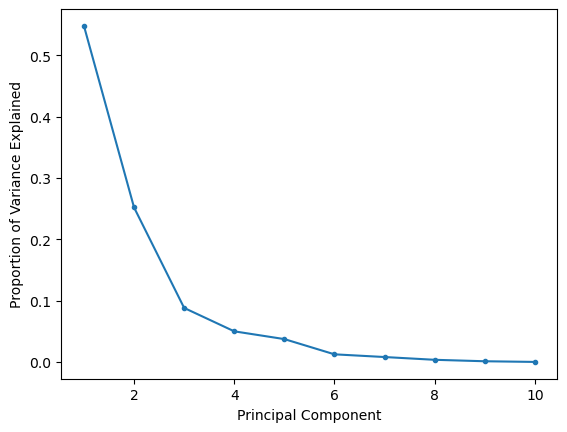

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, '.-')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
plt.show()

The aim of the scree or elbow plot is to identify the "elbow" in the dataset. 
This is a subjective approach, but the elbow is essentially the point at which adding more components doesn't not add a significant gain in explained variance. 
So for the plot above, I would say that the elbow is around three principal components, so the first two should be sufficient for most interpretations. 

A slightly older approach is to use principal components that have eigenvalues greater than one, recall that the eigenvalue of the covariance matrix is the explained variance. 
We can plot this so called Kaiser criterion (or KL1) on our scree plot to see if this agrees with our suggestion from the elbow method. 

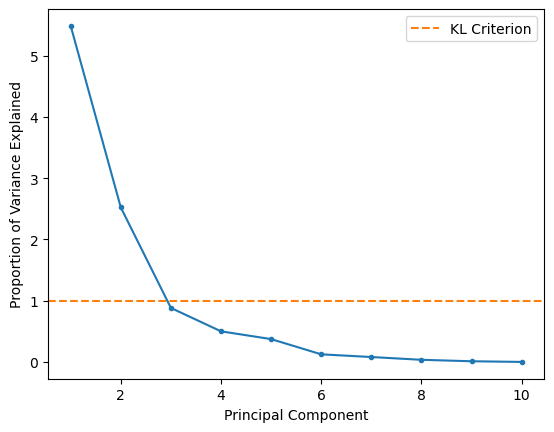

In [3]:
fig, ax = plt.subplots()
ax.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, '.-')
ax.axhline(1, color='#ff7f0e', linestyle='--', label='KL Criterion')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
ax.legend()
plt.show()

## What Do the Principal Components Mean?



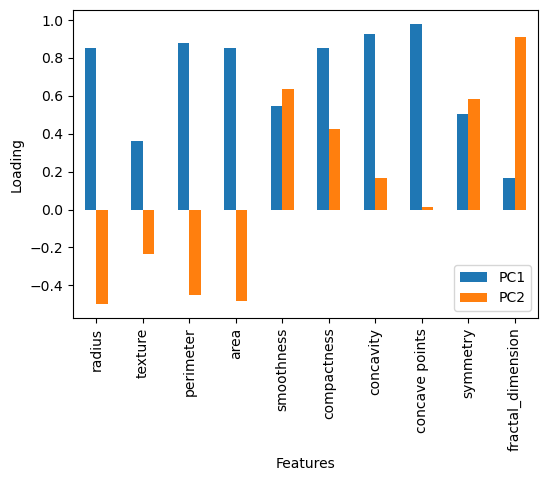

In [4]:
import numpy as np

loading_matrix = pd.DataFrame(pca.components_.T[:, :2] * np.sqrt(pca.explained_variance_[:2]), 
                              columns=['PC1', 'PC2'], index=data.columns[1:11])

fig, ax = plt.subplots(figsize=(6, 4))
loading_matrix.plot(kind='bar', ax=ax)
ax.set_xlabel('Features')
ax.set_ylabel('Loading')
plt.show()

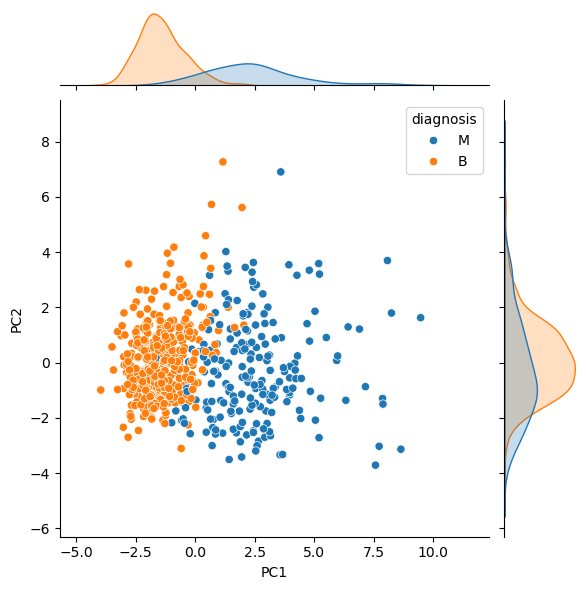

In [5]:
import seaborn as sns

sns.jointplot(x='PC1', y='PC2', hue='diagnosis', data=pc, kind='scatter')
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

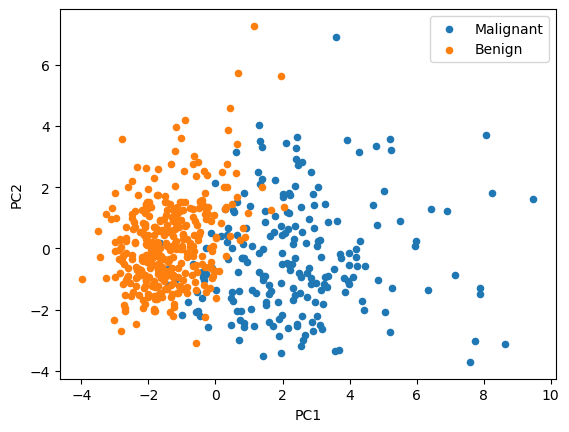

In [64]:
fig, ax = plt.subplots()
pc[data['diagnosis'] == 'M'].plot(kind='scatter', x='PC1', y='PC2', label='Malignant', ax=ax)
pc[data['diagnosis'] == 'B'].plot(kind='scatter', x='PC1', y='PC2', color='#ff7f0e', label='Benign', ax=ax)

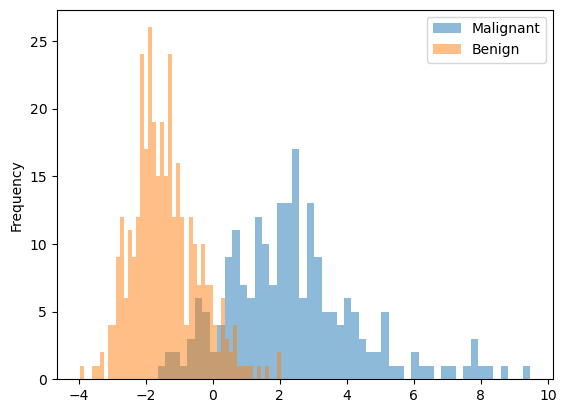

In [ ]:
fig, ax = plt.subplots()
data[data['diagnosis'] == 'M'].plot(kind='hist', y='PC1', bins=50, alpha=0.5, label='Malignant', ax=ax)
data_with_pca[data['diagnosis'] == 'B'].plot(kind='hist', y='PC1', bins=50, alpha=0.5, label='Benign', ax=ax)
plt.show()

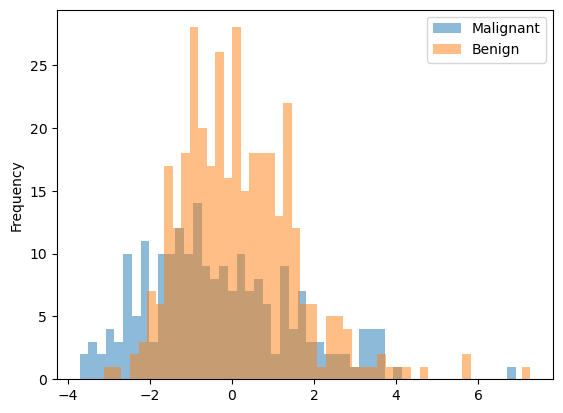

In [17]:
fig, ax = plt.subplots()
data_with_pca[data['diagnosis'] == 'M'].plot(kind='hist', y='PC2', bins=50, alpha=0.5, label='Malignant', ax=ax)
data_with_pca[data['diagnosis'] == 'B'].plot(kind='hist', y='PC2', bins=50, alpha=0.5, label='Benign', ax=ax)
plt.show()